In [49]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler

## Data

In [51]:
X, y = make_blobs(n_samples=1_000, n_features=2, centers=2)
X_std = StandardScaler().fit_transform(X)

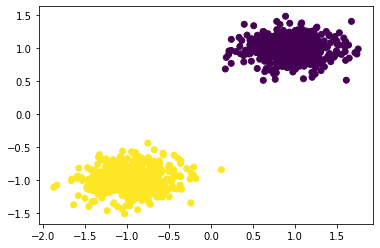

In [52]:
plt.scatter(X_std[:,0], X_std[:,1], c=y)

## Model fitting

In [53]:
models = {
    'linear_svc': LinearSVC(),
    'svc': SVC(kernel='linear'),
    'sgd_classifier': SGDClassifier(),
}

for model in models:
    models[model].fit(X, y)

## Model analysis

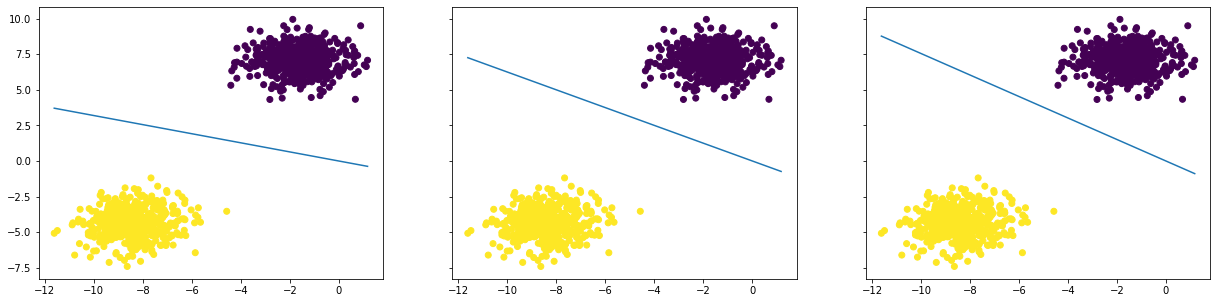

In [55]:
fig, axs = plt.subplots(1,3, figsize=(21,5), sharex=True, sharey=True)
for i, model in enumerate(models):
    coefs = models[model].coef_[0]
    
    x0_test = min(X[:,0])
    x1_test = max(X[:,0])
    
    y0_test = -(coefs[0] / coefs[1]) * x0_test
    y1_test = -(coefs[0] / coefs[1]) * x1_test
    
    axs[i].scatter(X[:,0], X[:,1], c=y)
    axs[i].plot([x0_test, x1_test], [y0_test, y1_test])